In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from matplotlib.pyplot import figure
from scipy import stats
from scipy.stats import skewnorm

In [3]:
ObsHMXB = pd.read_csv(r'C:\Users\iatpuser\Desktop\Code\Honors Independent Study\data\Obsereved HMXBs.csv', low_memory=False)


In [6]:
ObsHMXB.columns

Index(['Main_ID', 'RAdeg', 'DEdeg', 'PosErr', 'Pos_ref', 'Spectype',
       'Spectype_ref', 'Class', 'Compact', 'Mx',
       ...
       '2MASS_ID', '2MASS_RA', '2MASS_Dec', '2MASS_err', '2MASS_ref',
       'Gaia_ID', 'Gaia_RA', 'Gaia_Dec', 'Gaia_err', 'Gaia_ref'],
      dtype='object', length=114)

In [8]:
ObsHMXB


,Main_ID,RAdeg,DEdeg,PosErr,Pos_ref,Spectype,Spectype_ref,Class,Compact,Mx,...,2MASS_ID,2MASS_RA,2MASS_Dec,2MASS_err,2MASS_ref,Gaia_ID,Gaia_RA,Gaia_Dec,Gaia_err,Gaia_ref
0,IGR J00370+6122,9.290133,61.360133,2.337165e-09,NaN,BN0.7 Ib,2014A&A...566A.131G,sg,NS,NaN,...,2MASS J00370963+6121363,9.290125,61.360111,0.000019,NaN,427234969757165952,9.290133,61.360133,2.337165e-09,NaN
1,gam Cas,14.177451,60.716723,5.093332e-07,NaN,B0.5IVpe,2011ARep...55...31S,Be,NaN,NaN,...,2MASS J00564251+6043002,14.177127,60.716743,0.000081,NaN,426558460884582016,14.177451,60.716723,5.093332e-07,NaN
2,EM* AS 14,18.996041,59.153945,3.050714e-09,NaN,B2,1960IzKry..24..160B,NaN,NaN,NaN,...,2MASS J01155905+5909141,18.996062,59.153919,0.000017,NaN,414196617287885312,18.996041,59.153945,3.050714e-09,NaN
3,2S 0114+650,19.511227,65.291623,2.072556e-09,NaN,B1Iae,2015A&A...579A.111K,sg,NS,NaN,...,2MASS J01180266+6517298,19.511102,65.291618,0.000017,NaN,524924310153249920,19.511227,65.291623,2.072556e-09,NaN
4,4U 0115+634,19.633193,63.742522,3.026561e-09,NaN,B0.2Ve,2001A&A...369..108N,Be,NS,NaN,...,2MASS J01183196+6344330,19.633192,63.742519,0.000017,NaN,524677469790488960,19.633193,63.742522,3.026561e-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1H 2202+501,330.409192,50.167952,3.113065e-09,NaN,Be,1964LS....C03....0H,Be,NaN,NaN,...,2MASS J22013820+5010046,330.409184,50.167953,0.000017,NaN,1979911002134040960,330.409192,50.167952,3.113065e-09,NaN
160,4U 2206+543,331.984288,54.518432,3.347356e-09,NaN,O9.5Vep,2006A&A...446.1095B,Be,NS,NaN,...,2MASS J22075623+5431064,331.984313,54.518459,0.000019,NaN,2005653524280214400,331.984288,54.518432,3.347356e-09,NaN
161,SAX J2239.3+6116,339.836830,61.274053,3.460414e-09,NaN,B0Ve,2017A&A...598A..16R,Be,NS,NaN,...,2MASS J22392085+6116266,339.836886,61.274059,0.000019,NaN,2201091578667140352,339.836830,61.274053,3.460414e-09,NaN
162,MWC 656,340.738741,44.721725,3.678116e-09,NaN,B1.5-B2IIIe,2014Natur.505..378C,Be,BH,5.4,...,2MASS J22425730+4443183,340.738777,44.721760,0.000017,NaN,1982359580155628160,340.738741,44.721725,3.678116e-09,NaN


(array([ 3.,  1.,  6.,  3., 11., 10.,  5.,  1., 21.,  2.,  4.,  1.,  5.,
         0.,  1.,  0.,  4.,  3.,  0.,  1.,  4.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.]),
 array([ 6.8       ,  8.10666667,  9.41333333, 10.72      , 12.02666667,
        13.33333333, 14.64      , 15.94666667, 17.25333333, 18.56      ,
        19.86666667, 21.17333333, 22.48      , 23.78666667, 25.09333333,
        26.4       , 27.70666667, 29.01333333, 30.32      , 31.62666667,
        32.93333333, 34.24      , 35.54666667, 36.85333333, 38.16      ,
        39.46666667, 40.77333333, 42.08      , 43.38666667, 44.69333333,
        46.        ]),
 <BarContainer object of 30 artists>)

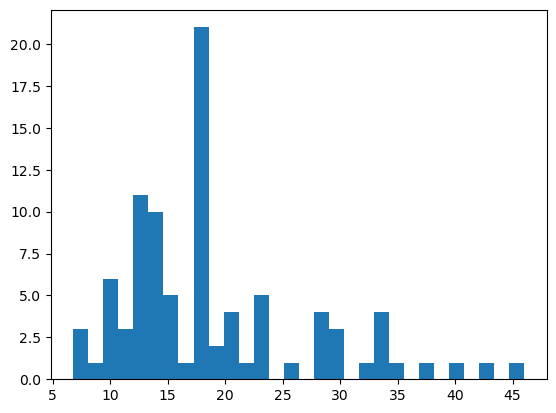

In [16]:
plt.hist(ObsHMXB['Mo'], bins=30)